In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set()
plt.style.use('ggplot')

# **1. Collecting Data**

In [118]:
df = pd.read_csv("/content/breast-cancer.csv")

In [119]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#**2. Data Preprocessing**

In [120]:
# DATA PREPROCESSING
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [121]:
#M-> Maligning
#B-> Benign

In [122]:
# Supervised Machine Learning Problem because target is given

In [123]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [125]:
#missing value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<Axes: >

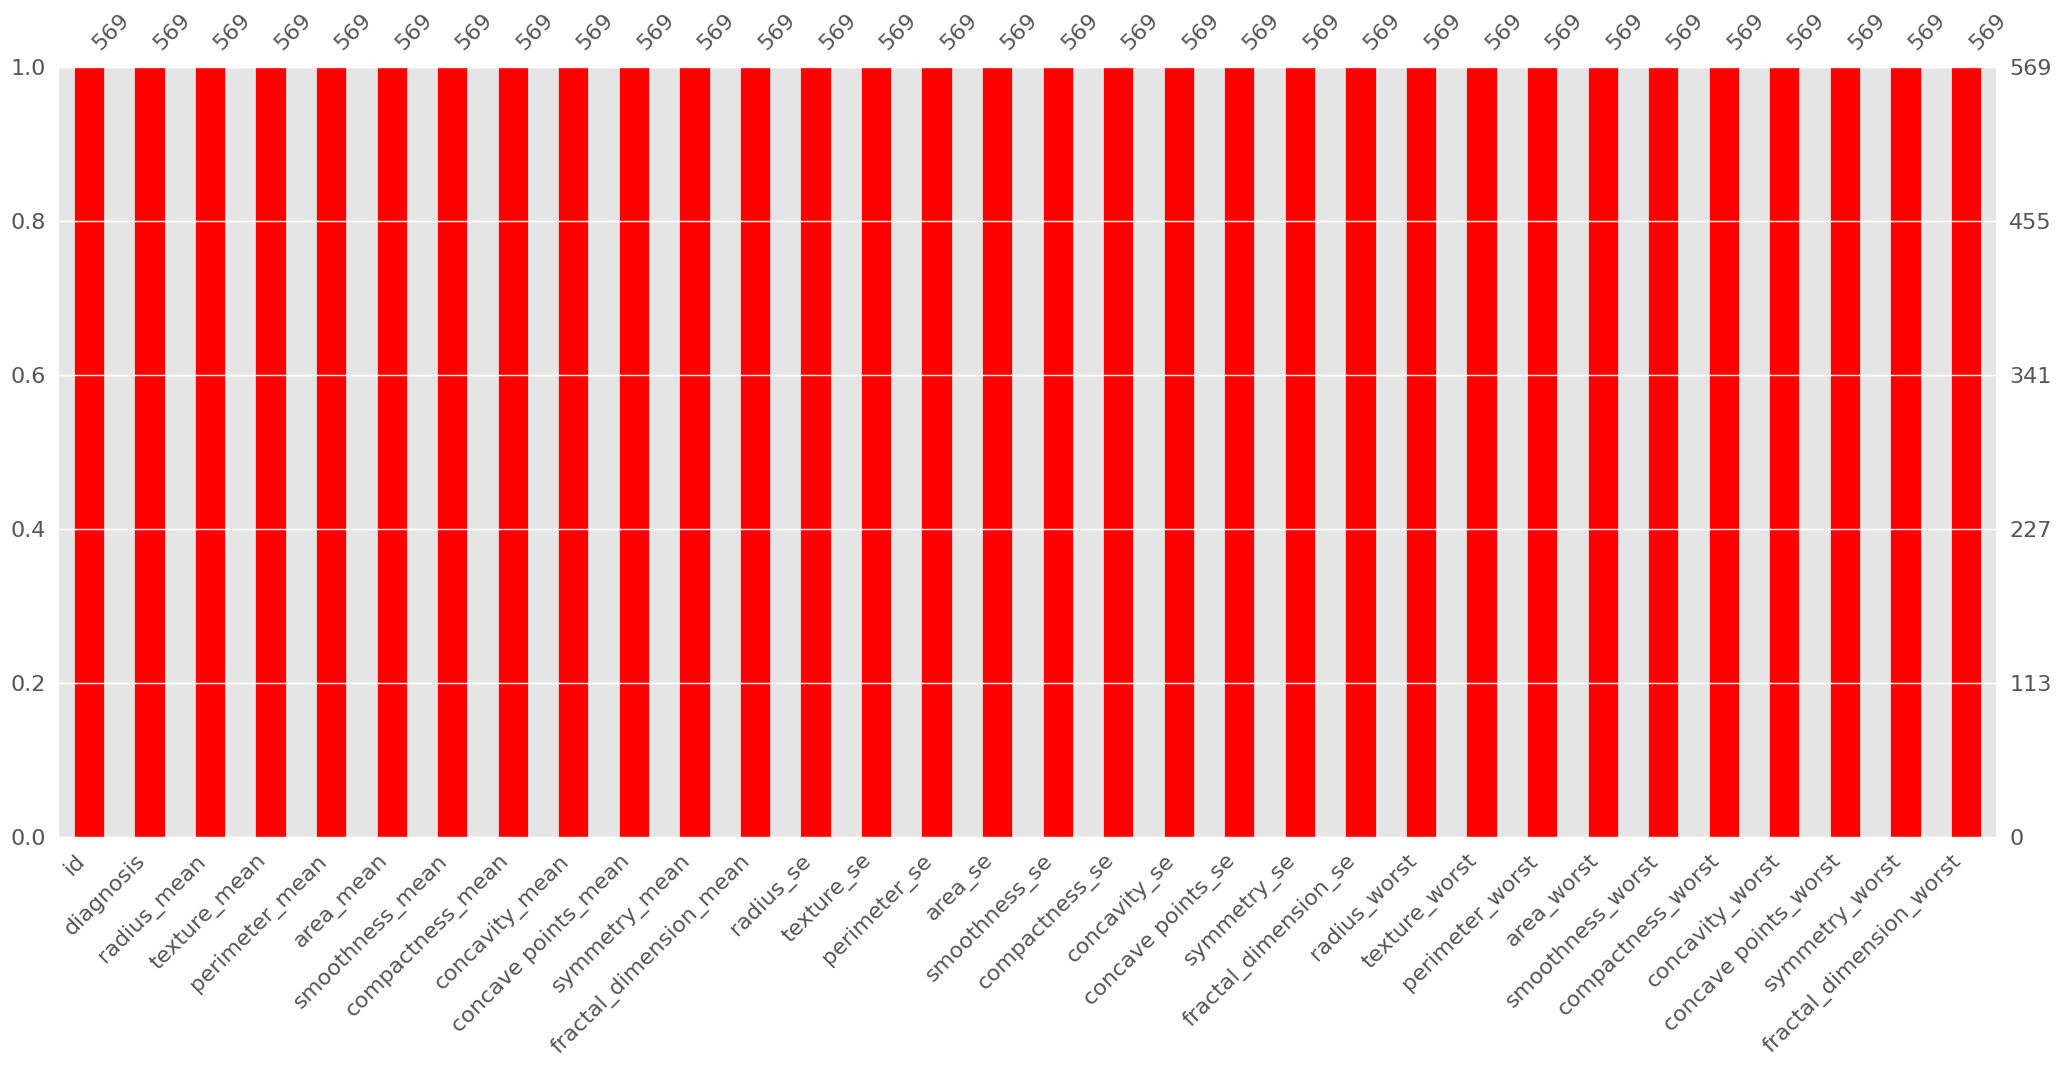

In [126]:
msno.bar(df,color="red")

In [127]:
#There are no missing values in the dataset


In [128]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

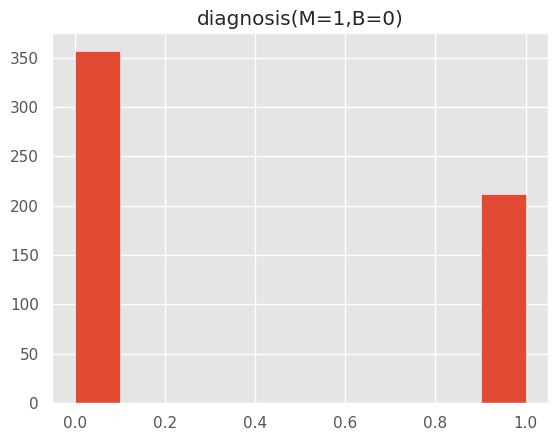

In [129]:
plt.hist(df["diagnosis"])
plt.title("diagnosis(M=1,B=0)")
plt.show()

#**3. Exploratory Data Analytics**

**Checking for outliers**

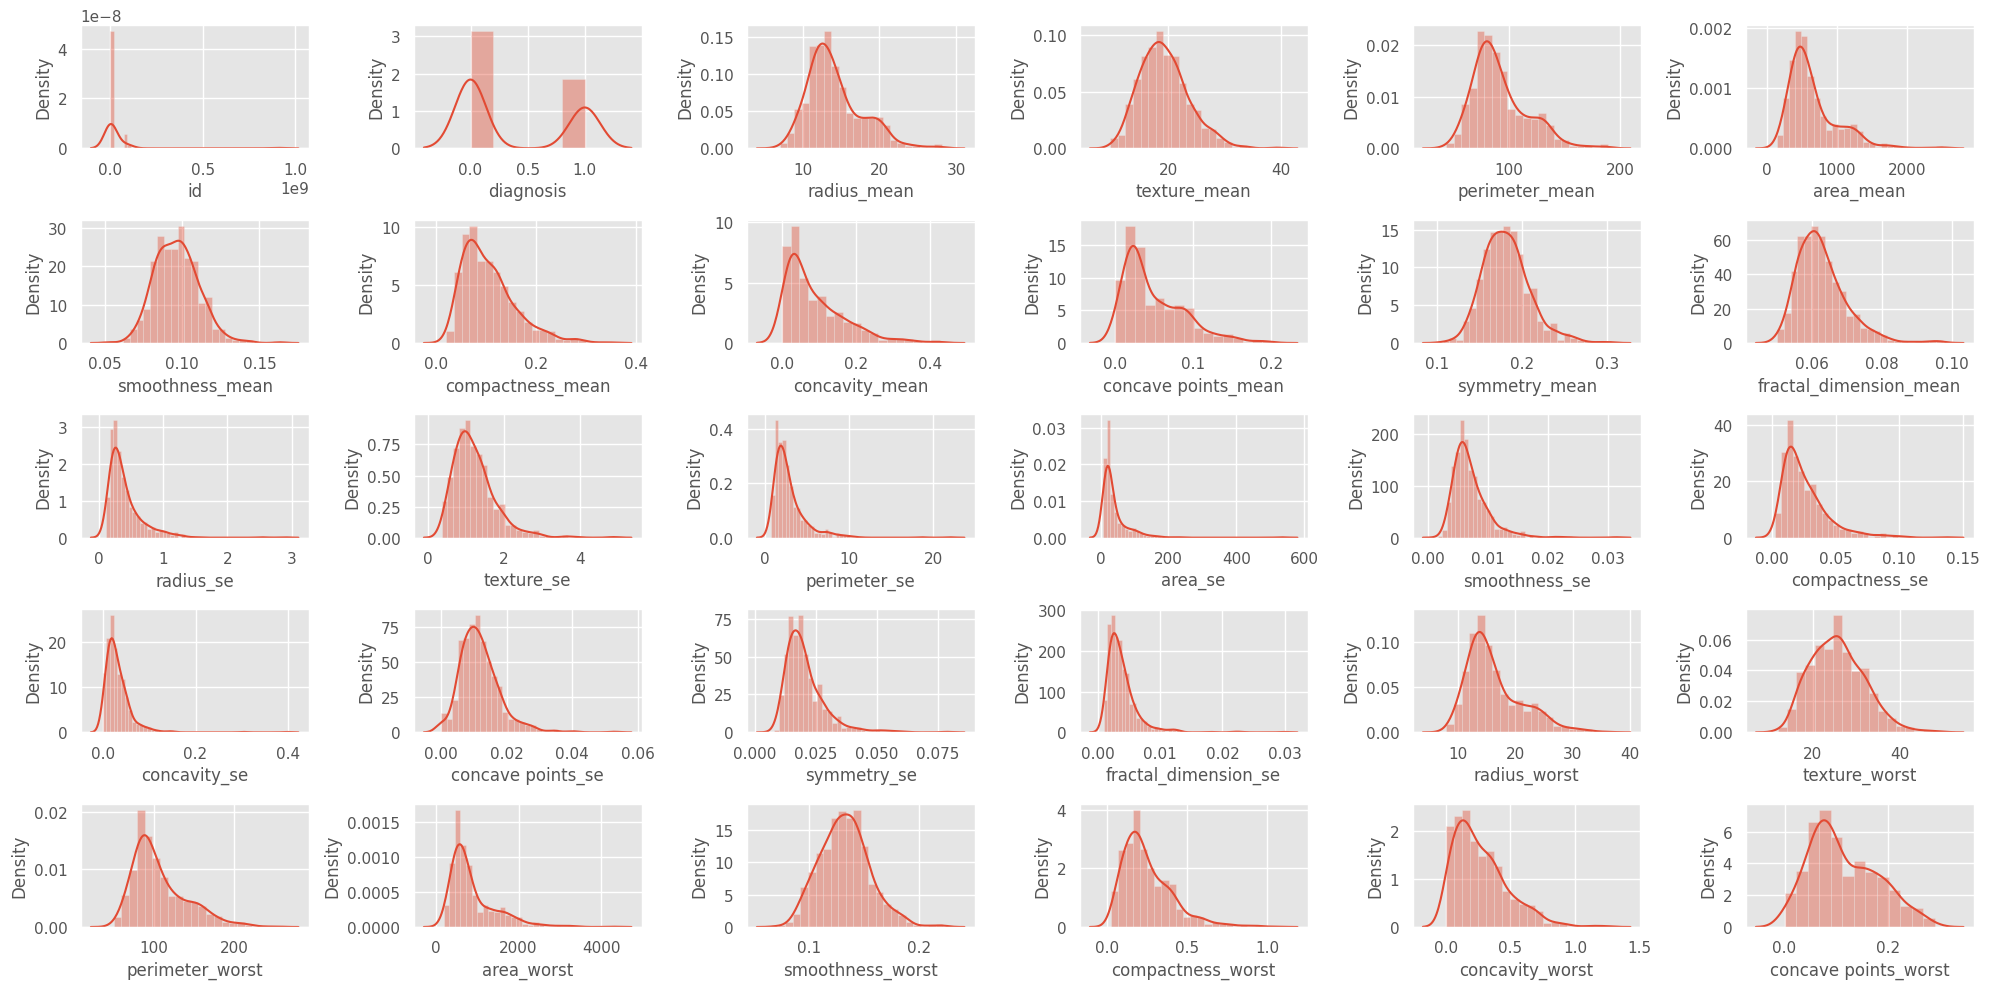

In [130]:
# Each 5 row its having 6 columns
# density graph
plt.figure(figsize=(20,10))
plotnumber = 1
for column in df:
  if plotnumber<= 30:
    ax = plt.subplot(5,6,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber+=1

plt.tight_layout()
plt.show()

Identifying the correlation between the features for feature reduction

In [131]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


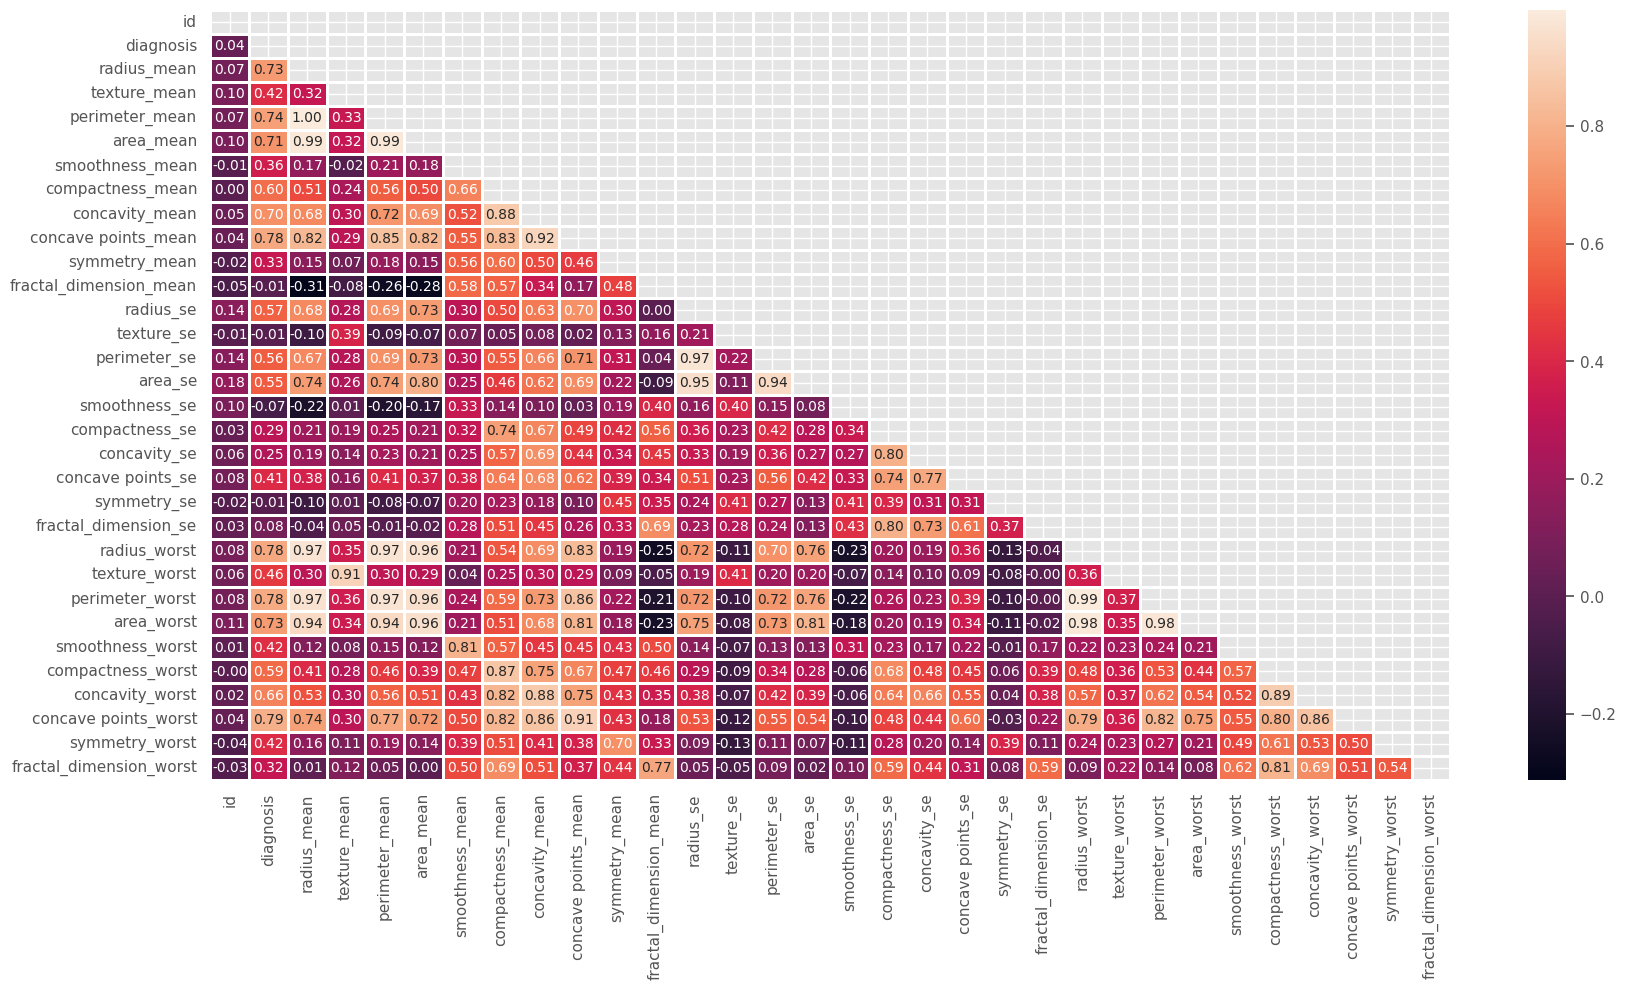

In [132]:
#heatmap
plt.figure(figsize=(20,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,linewidths = 1,annot=True,fmt = ".2f")
plt.show()

In [133]:
#Multicollinearity so we need to do feature selection -> Highly correlated feature needs to drop to avoid multicollinearity


#**4.Feature Engineering**

In [134]:
df.drop('id',axis = 1,inplace=True)

In [135]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [ x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop,axis=1)

print(df.shape[1])

23


In [136]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
# 32 features reduced it to 23 now

Identifying the independent and dependent feature

In [138]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
X_train.shape

(455, 22)

#**5. Model Selection And Training**

In [142]:
#Apply ML Algos

## **1st. Logistic Regression**

In [143]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [144]:
y_pred = log_reg.predict(X_test)

In [145]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [146]:
#Training Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_train_acc = accuracy_score(y_train,log_reg.predict(X_train))
print(f"Logistic Regression Training Accuracy : {log_reg_train_acc * 100}")

Logistic Regression Training Accuracy : 98.9010989010989


In [147]:
#Testing Accuracy - How well the model performed on unseen data
y_pred = log_reg.predict(X_test)
log_reg_test_acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Testing Accuracy : {log_reg_test_acc * 100}" )

Logistic Regression Testing Accuracy : 96.49122807017544


In [148]:
#Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



##**2nd. K- Nearest Neighbour**

In [149]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [150]:
y_pred = knn.predict(X_test)

In [151]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [152]:
#How well does it learn training data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
print(f"KNN Training Accuracy: {knn_train_acc * 100}")

KNN Training Accuracy: 96.7032967032967


In [153]:
knn_test_acc = accuracy_score(y_test,y_pred)
print(f"KNN Testing Accuracy : {knn_test_acc * 100}")

KNN Testing Accuracy : 95.6140350877193


In [154]:
#Confusion Matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##**3rd. Support Vector Machine**

In [155]:
#SVM ->Suppport Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability = True)

parameters = {
    'gamma' : [0.001,0.01,0.1,1],
    'C' : [0.001,0.01,0.1,1,10,15,20]
}
grid_search = GridSearchCV(svc,parameters)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 20],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [156]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [157]:
grid_search.best_score_

np.float64(0.9802197802197803)

In [158]:
svc = SVC(C = 15,gamma = 0.01,probability = True)
svc.fit(X_train,y_train)

SVC(C=15, gamma=0.01, probability=True)

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
print(f"SVM Training Accuracy: {svc_train_acc * 100}")

SVM Training Accuracy: 98.9010989010989


In [160]:
y_pred = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test,y_pred)
print(f"SVM Testing Accuracy : {svc_test_acc * 100}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVM Testing Accuracy : 98.24561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##**4th.Decision Tree**

In [161]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'splitter':['best','random']
}
grid_search_dt = GridSearchCV(dtc,parameters,cv=5,n_jobs=-1,verbose=1)
grid_search_dt.fit(X_train,y_train)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [162]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'splitter': 'random'}

In [163]:
grid_search_dt.best_score_

np.float64(0.9604395604395604)

In [164]:
dtc= DecisionTreeClassifier(criterion='entropy',max_depth=26,min_samples_leaf=2,min_samples_split=2,splitter='random')

In [165]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=2,
                       splitter='random')

In [166]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc_train_acc = accuracy_score(y_train,dtc.predict(X_train))
print(f"Decision Tree Train Accuracy : {dtc_train_acc * 100}")

Decision Tree Train Accuracy : 99.78021978021978


In [167]:
y_pred = dtc.predict(X_test)
dtc_test_acc = accuracy_score(y_test,y_pred)
print(f"Decision Tree Test Accuracy : {dtc_test_acc * 100} ")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Decision Tree Test Accuracy : 93.85964912280701 
[[61  6]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        67
           1       0.88      0.98      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



##**5th.Random Forest**

In [168]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)

parameters = {
    'n_estimators':[100,200],
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20],
    'min_samples_split':range(2,5),
    'min_samples_leaf':range(1,2),
    'max_features':['sqrt','log2'],
    'bootstrap':[True,False]
}

grid_search_rfc = GridSearchCV(rfc,parameters,cv=5,n_jobs=-1,verbose=1)
grid_search_rfc.fit(X_train,y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [100, 200]},
             verbose=1)

In [169]:
grid_search_rfc.best_params_


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [170]:
grid_search_rfc.best_score_

np.float64(0.9692307692307693)

In [171]:
rfc = RandomForestClassifier(
    bootstrap=True,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=200,
    random_state=42
)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=3,
                       n_estimators=200, random_state=42)

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc_train_acc = accuracy_score(y_train,rfc.predict(X_train))
print(f"Random Forest Training Accuracy is {rfc_train_acc * 100}")

Random Forest Training Accuracy is 100.0


In [173]:
y_pred = rfc.predict(X_test)
rfc_test_acc = accuracy_score(y_test,y_pred)
print(f"Random Forest Testing Accuracy: {rfc_test_acc * 100}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Random Forest Testing Accuracy: 96.49122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



##**6th. Gradient Boosting**

In [174]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss' : ['deviance','exponential'],
    'learning_rate' : [0.001,0.01,0.1,1],
    'n_estimators' : [100,200,300]
}

grid_search_gbc = GridSearchCV(gbc,parameters,cv=2,n_jobs=-5,verbose=1)
grid_search_gbc.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [175]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 300}

In [176]:
grid_search_gbc.best_score_

np.float64(0.9670762810108973)

In [177]:
gbc = GradientBoostingClassifier(
    learning_rate=1,
    loss='exponential',
    n_estimators=300
)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=300)

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbc_train_acc = accuracy_score(y_train,rfc.predict(X_train))
print(f"Gradient Boosting Training Accuracy : {gbc_train_acc * 100}")

Gradient Boosting Training Accuracy : 100.0


In [179]:
y_pred = gbc.predict(X_test)
gbc_test_acc = accuracy_score(y_test,y_pred)
print(f"Gradient Boosting Testing Accuracy : {gbc_test_acc * 100}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Gradient Boosting Testing Accuracy : 99.12280701754386
[[67  0]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



##**7th. XgBoost Classifier**

In [180]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

parameters = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [3, 5],                # Depth of each tree
    'learning_rate': [0.05, 0.1],    # Step size shrinkage
    'subsample': [0.8, 1.0],               # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 1.0],        # Fraction of features per tree
    'gamma': [0, 0.1],                 # Minimum loss reduction
    'reg_alpha': [0, 0.01],            # L1 regularization
    'reg_lambda': [1,2]              # L2 regularization
}

grid_search_xgb = GridSearchCV(xgb, parameters,cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'reg_alpha': [0, 0.01],
                         'reg_lambda': [1, 2], 'subsample': [0.8, 1.0]},
             verbose=1)

In [181]:
grid_search_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

In [182]:
grid_search_xgb.best_score_

np.float64(0.9736263736263735)

In [183]:
xgb = XGBClassifier (
    colsample_bytree = 1.0,
     gamma = 0.1,
     learning_rate = 0.1,
     max_depth = 5,
     n_estimators = 200,
     reg_alpha = 0,
     reg_lambda  = 1,
     subsample = 0.8
)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [184]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_train_acc = accuracy_score(y_train,rfc.predict(X_train))
print(f"XGBoost Training Accuracy : {xgb_train_acc * 100}")

XGBoost Training Accuracy : 100.0


In [185]:
y_pred = xgb.predict(X_test)
xgb_test_acc = accuracy_score(y_test,y_pred)
print(f"XGBoost Testing Accuracy : {xgb_test_acc * 100}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

XGBoost Testing Accuracy : 98.24561403508771
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#**6.Model Evaluation**

In [194]:
models = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
    'Score':[100*round(log_reg_test_acc,4),100*round(knn_test_acc,4),100*round(svc_test_acc,4),100*round(dtc_test_acc,4),100*round(rfc_test_acc,4),100*round(gbc_test_acc,4),100*round(xgb_test_acc,4)]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
5,Gradient Boosting,99.12
6,XGBoost,98.25
2,SVM,98.25
4,Random Forest,96.49
0,Logistic Regression,96.49
1,KNN,95.61
3,Decision Tree,93.86


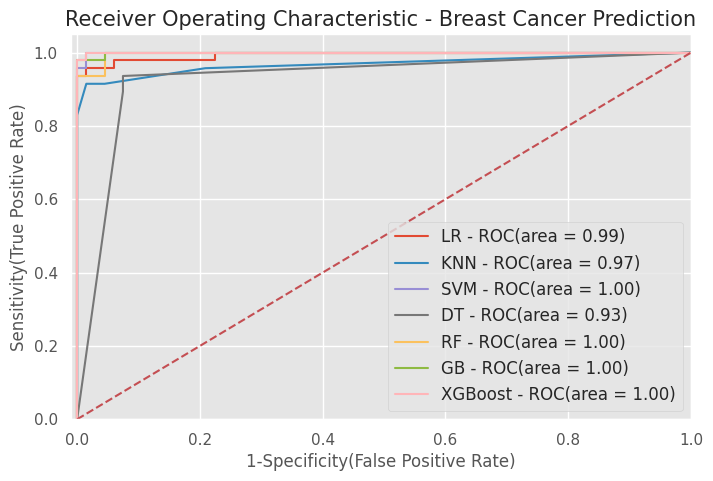

In [193]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

models = [
    {'label':'LR', 'model':log_reg},
    {'label':'KNN', 'model':knn},
    {'label':'SVM', 'model':svc},
    {'label':'DT', 'model':dtc},
    {'label':'RF', 'model':rfc},
    {'label':'GB', 'model':gbc},
    {'label':'XGBoost', 'model':xgb}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)

    # Get probability scores or decision values
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # Positive class prob
    else:
        y_score = model.decision_function(X_test)    # For SVM without probas

    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_score)
    auc = metrics.roc_auc_score(y_test, y_score)

    plt.plot(fpr1, tpr1, label='%s - ROC(area = %0.2f)' % (m['label'], auc))

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=12)
plt.title('Receiver Operating Characteristic - Breast Cancer Prediction', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("Roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()



[96.49, 95.61, 98.25, 93.86, 96.49, 99.11999999999999, 98.25]
[np.float64(99.36), np.float64(96.82), np.float64(99.94), np.float64(99.21), np.float64(99.71), np.float64(99.9), np.float64(99.97)]


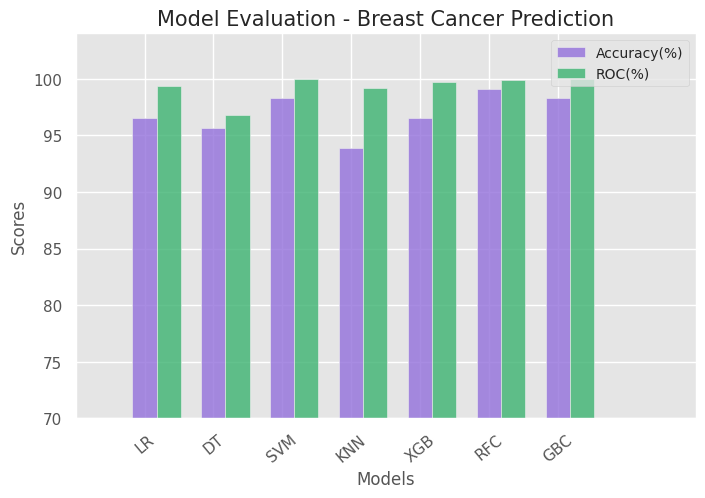

In [192]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
    {'label':'LR', 'model':log_reg},
    {'label':'KNN', 'model':knn},
    {'label':'SVM', 'model':svc},
    {'label':'DT', 'model':dtc},
    {'label':'RF', 'model':rfc},
    {'label':'GB', 'model':gbc},
    {'label':'XGBoost', 'model':xgb}
]

means_roc = []
means_accuracy = [100*round(log_reg_test_acc,4),100*round(knn_test_acc,4),100*round(svc_test_acc,4),100*round(dtc_test_acc,4),100*round(rfc_test_acc,4),100*round(gbc_test_acc,4),100*round(xgb_test_acc,4)]

for m in models:
  model = m['model']
  model.fit(X_train, y_train)
  y_pred = model.predict_proba(X_test)[:, 1]
  fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  auc = 100*round(auc,4)
  means_roc.append(auc)

print(means_accuracy)
print(means_roc)

#data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

#create
fig,ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,means_accuracy,bar_width,alpha=opacity,color='MediumPurple',label='Accuracy(%)')
rects2 = plt.bar(index+bar_width,means_roc,bar_width,alpha=opacity,color='MediumSeaGreen',label='ROC(%)')

plt.xlim([-1,8])
plt.ylim([70,104])

plt.title("Model Evaluation - Breast Cancer Prediction",fontsize = 15)
plt.xticks(index,('LR','DT','SVM','KNN','XGB','RFC','GBC'),rotation = 40)
plt.legend(loc="upper right",fontsize = 10)
plt.xlabel("Models",fontsize = 12)
plt.ylabel("Scores",fontsize = 12)
plt.savefig("PE_Breast_Cancer.jpeg",format='jpeg',dpi=400,bbox_inches='tight')
plt.show( )

#**7. Model Deployment**

In [196]:
import pickle
model = gbc
pickle.dump(model,open('Breast_cancer.pkl','wb'))